In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt






sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline

 

In [2]:
# import sys
# !{sys.executable} -m pip install ipysankeywidget


# Load adata

In [3]:
""""
can ski plots of intermediatry steps below by using

adata_all = sc.read_h5ad('/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30.h5ad.updated',)

"""

'"\ncan ski plots of intermediatry steps below by using\n\nadata_all = sc.read_h5ad(\'/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30.h5ad.updated\',)\n\n'

In [4]:
import scanpy as sc
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v4')

In [53]:

sc.settings.figdir = "sfig5"


# Marker genes

In [5]:
adata.X[:6,:6].A

array([[0.        , 0.        , 0.51248444, 0.51248444, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.91178454, 0.        , 0.        ,
        0.        ],
       [0.58537907, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.39431788, 0.        , 0.39431788, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [6]:
adata

AnnData object with n_obs × n_vars = 165649 × 36601
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl1_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'fb_vs_other', 'fb_vs_other2', 'core', 'fbs_pericytes_other', 'leiden_res1', 'leiden_res1.5', 'old_annotation', 'test', 'fbs', 'fbs2', 'fbs3', 'new_annotation3', 'new_annotation2', 'new_annotation1', 'new_annotation00', 'fb_status_figs', 'Location_original', 'Location_broad', 'Location_detailed', 'leiden_res0.5', '

In [7]:
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
# adata

In [8]:
# adata.obs["combined"] = adata.obs["test13"].astype(str) + "_" + adata.obs["Site_status_binary"].astype(str)

In [9]:
adata.obs.corefb_names2.value_counts()

corefb_names2
F2: Universal         60120
F2/3: Perivascular    29376
F1: Superficial       27427
F4: DS_DPEP1+         19969
F3: FRC-like          19884
F4: TNN+COCH+          3604
F5: NGFR+              2769
F5: RAMP1+             1535
F4: DP_HHIP+            965
Name: count, dtype: int64

In [10]:
sc.tl.rank_genes_groups(adata, 'corefb_names2', method='t-test', key_added="rank_genes_groups");
df2 = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
df2.head(1)


F1: Superficial F2: Universal F2/3: Perivascular F3: FRC-like F4: DS_DPEP1+  \
0          COL6A1           DCN               APOD         APOE         POSTN   

  F4: TNN+COCH+ F4: DP_HHIP+ F5: RAMP1+ F5: NGFR+  
0          COCH         PTMA        CPE    TM4SF1

In [11]:
# adata = adata[adata.obs["combined"].str.startswith("F1")]

# GSEA

In [12]:
color_palettes = {
    'Nonlesional':  '#ffffe5',  # Light Salmon
    'Lesional': '#fece65',  # Dark Orange
    'F2: Universal': '#d1e2f2',  # Dodger Blue
    'F2/3: Perivascular': '#7fb8da',  # Deep Sky Blue
    'F3: CCL19+':  '#fee5d8',  # Tomato Red

    'F4: DS_DPEP1+':  '#e7f5e5',  # Lime Green
    'F4: TNN+COCH+':  '#80ca80',  # Medium Sea Green
    'F4: DP_HHIP+': '#51a46b',  # Sea Green

    'F5: RAMP1+':  '#9e9ac8',  # Medium Purple
    'F5: NGFR+':  '#796eb2',  # Steel Blue
    'F6: Myofibroblast chemokine-high': '#05ffff',  # Steel Blue
    'F6: Myofibroblast':  '#55aaff',  # Steel Blue

    'F7: Myofibroblast fascia-like':  '#f48ebe',  # Dark Red
    'F_Fascia':  '#454545',  # Gray
}

In [13]:
# result = adata.uns['rank_genes_groups']
# groups = result['names'].dtype.names
# marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})

# print(marker_genes.head())

# for cluster in marker_genes.columns:
#     gene_list = marker_genes[cluster].tolist()
#     enr = gp.enrichr(gene_list=gene_list[:500],
#                      #description=f'Cluster_{cluster}',
#                      gene_sets='GO_Biological_Process_2023',  #'GO_Biological_Process_2021' # You can choose other gene sets here
#                      outdir='GSEA_plots',  # Directory to save results
#                      cutoff=0.05  # Cutoff for statistical significance
#                     )
#     print(enr.results.head())


In [14]:
# adata_core = adata[adata.obs["combined"].str.startswith("F1")]


In [15]:
# adata_core.obs.combined.value_counts()

In [16]:
result = adata.uns['rank_genes_groups']
result

{'params': {'groupby': 'corefb_names2',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('COL6A1', 'DCN', 'APOD', 'APOE', 'POSTN', 'COCH', 'PTMA', 'CPE', 'TM4SF1'),
            ('COL18A1', 'FBLN1', 'APOE', 'CCL19', 'F2R', 'ASPN', 'INHBA', 'APOD', 'CYP1B1'),
            ('CD9', 'CCN5', 'FGF7', 'IGFBP7', 'COL11A1', 'SPARCL1', 'WNT5A', 'SFRP1', 'IGFBP7'),
            ...,
            ('IGFBP6', 'PTGDS', 'CD9', 'MMP2', 'ADIRF', 'C3', 'ADH1B', 'CA12', 'MFAP4'),
            ('CXCL12', 'SPARCL1', 'F13A1', 'IGFBP6', 'CCN5', 'SFRP2', 'CCN5', 'CTHRC1', 'DPT'),
            ('MGP', 'APOE', 'AQP1', 'MFAP5', 'MGST1', 'MGP', 'C3', 'WIF1', 'CCN5')],
           dtype=[('F1: Superficial', 'O'), ('F2: Universal', 'O'), ('F2/3: Perivascular', 'O'), ('F3: FRC-like', 'O'), ('F4: DS_DPEP1+', 'O'), ('F4: TNN+COCH+', 'O'), ('F4: DP_HHIP+', 'O'), ('F5: RAMP1+', 'O'), ('F5: NGFR+', 'O')]),
 'scores': rec.array([( 194.4

In [17]:
groups = list(df2.columns)
marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})
marker_genes
#groups = ['F1: Superficial_Lesional',
# 'F1: Superficial_Nonlesional',]

F1: Superficial F2: Universal F2/3: Perivascular F3: FRC-like  \
0              COL6A1           DCN               APOD         APOE   
1             COL18A1         FBLN1               APOE        CCL19   
2                 CD9          CCN5               FGF7       IGFBP7   
3              APCDD1        CTHRC1             IGFBP7       CXCL12   
4              COL6A2        S100A6                MGP        HLA-B   
...               ...           ...                ...          ...   
36596            GPX3       COL18A1             APCDD1          CPE   
36597          CHRDL1        COL4A1               WIF1       CTHRC1   
36598          IGFBP6         PTGDS                CD9         MMP2   
36599          CXCL12       SPARCL1              F13A1       IGFBP6   
36600             MGP          APOE               AQP1        MFAP5   

      F4: DS_DPEP1+ F4: TNN+COCH+ F4: DP_HHIP+ F5: RAMP1+ F5: NGFR+  
0             POSTN          COCH         PTMA        CPE    TM4SF1  
1               F2R          ASPN        INHBA       APOD    CYP1B1  
2           COL11A1       SPARCL1        WNT5A      SFRP1    IGFBP7  
3              ASPN           OGN       IGFBP3     FGFBP2     TAGLN  
4              GPC3           TNN        TRPS1    OLFML2A     NR2F2  
...             ...           ...          ...        ...       ...  
36596           CLU          APOD      ANGPTL1       PDPN     FBLN1  
36597        SCARA5        EFEMP1       CXCL12         CP     ROBO2  
36598         ADIRF            C3        ADH1B       CA12     MFAP4  
36599          CCN5         SFRP2         CCN5     CTHRC1       DPT  
36600         MGST1           MGP           C3       WIF1      CCN5  

[36601 rows x 9 columns]

In [39]:
gsea_results = []

for cluster in marker_genes.columns:
    gene_list = marker_genes[cluster].tolist()
    enr = gp.enrichr(gene_list=gene_list[:500],
                     gene_sets= 'GO_Biological_Process_2023',  # You can choose other gene sets here
                     outdir=None,  # Set to None to avoid creating output files
                     cutoff=0.05  # Cutoff for statistical significance
                    )
    enr.results['Cluster'] = cluster
    gsea_results.append(enr.results)

gsea_df = pd.concat(gsea_results)
gsea_df
"""
Reactome_2019 
'KEGG_2016',
'Reactome_2019',
'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
"""

# gsea_results = []

# for cluster in marker_genes.columns:
#     gene_list = marker_genes[cluster].tolist()
#     enr = gp.enrichr(gene_list=gene_list[:6000],
#                      gene_sets=  # You can choose other gene sets here
#                      outdir=None,  # Set to None to avoid creating output files
#                      cutoff=0.05  # Cutoff for statistical significance
#                     )
#     enr.results['Cluster'] = cluster
#     gsea_results.append(enr.results)

# gsea_df = pd.concat(gsea_results)
# gsea_df
# """

# Reactome_2019 
# 'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
# """



"\nReactome_2019 \n'KEGG_2016',\n'Reactome_2019',\n'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'\n"

In [40]:
gsea_df.columns

Index(['Gene_set', 'Term', 'Overlap', 'P-value', 'Adjusted P-value',
       'Old P-value', 'Old Adjusted P-value', 'Odds Ratio', 'Combined Score',
       'Genes', 'Cluster'],
      dtype='object')

/tmp/ipykernel_2680/3828753041.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, PLOTTING_VALUE)).reset_index(drop=True)


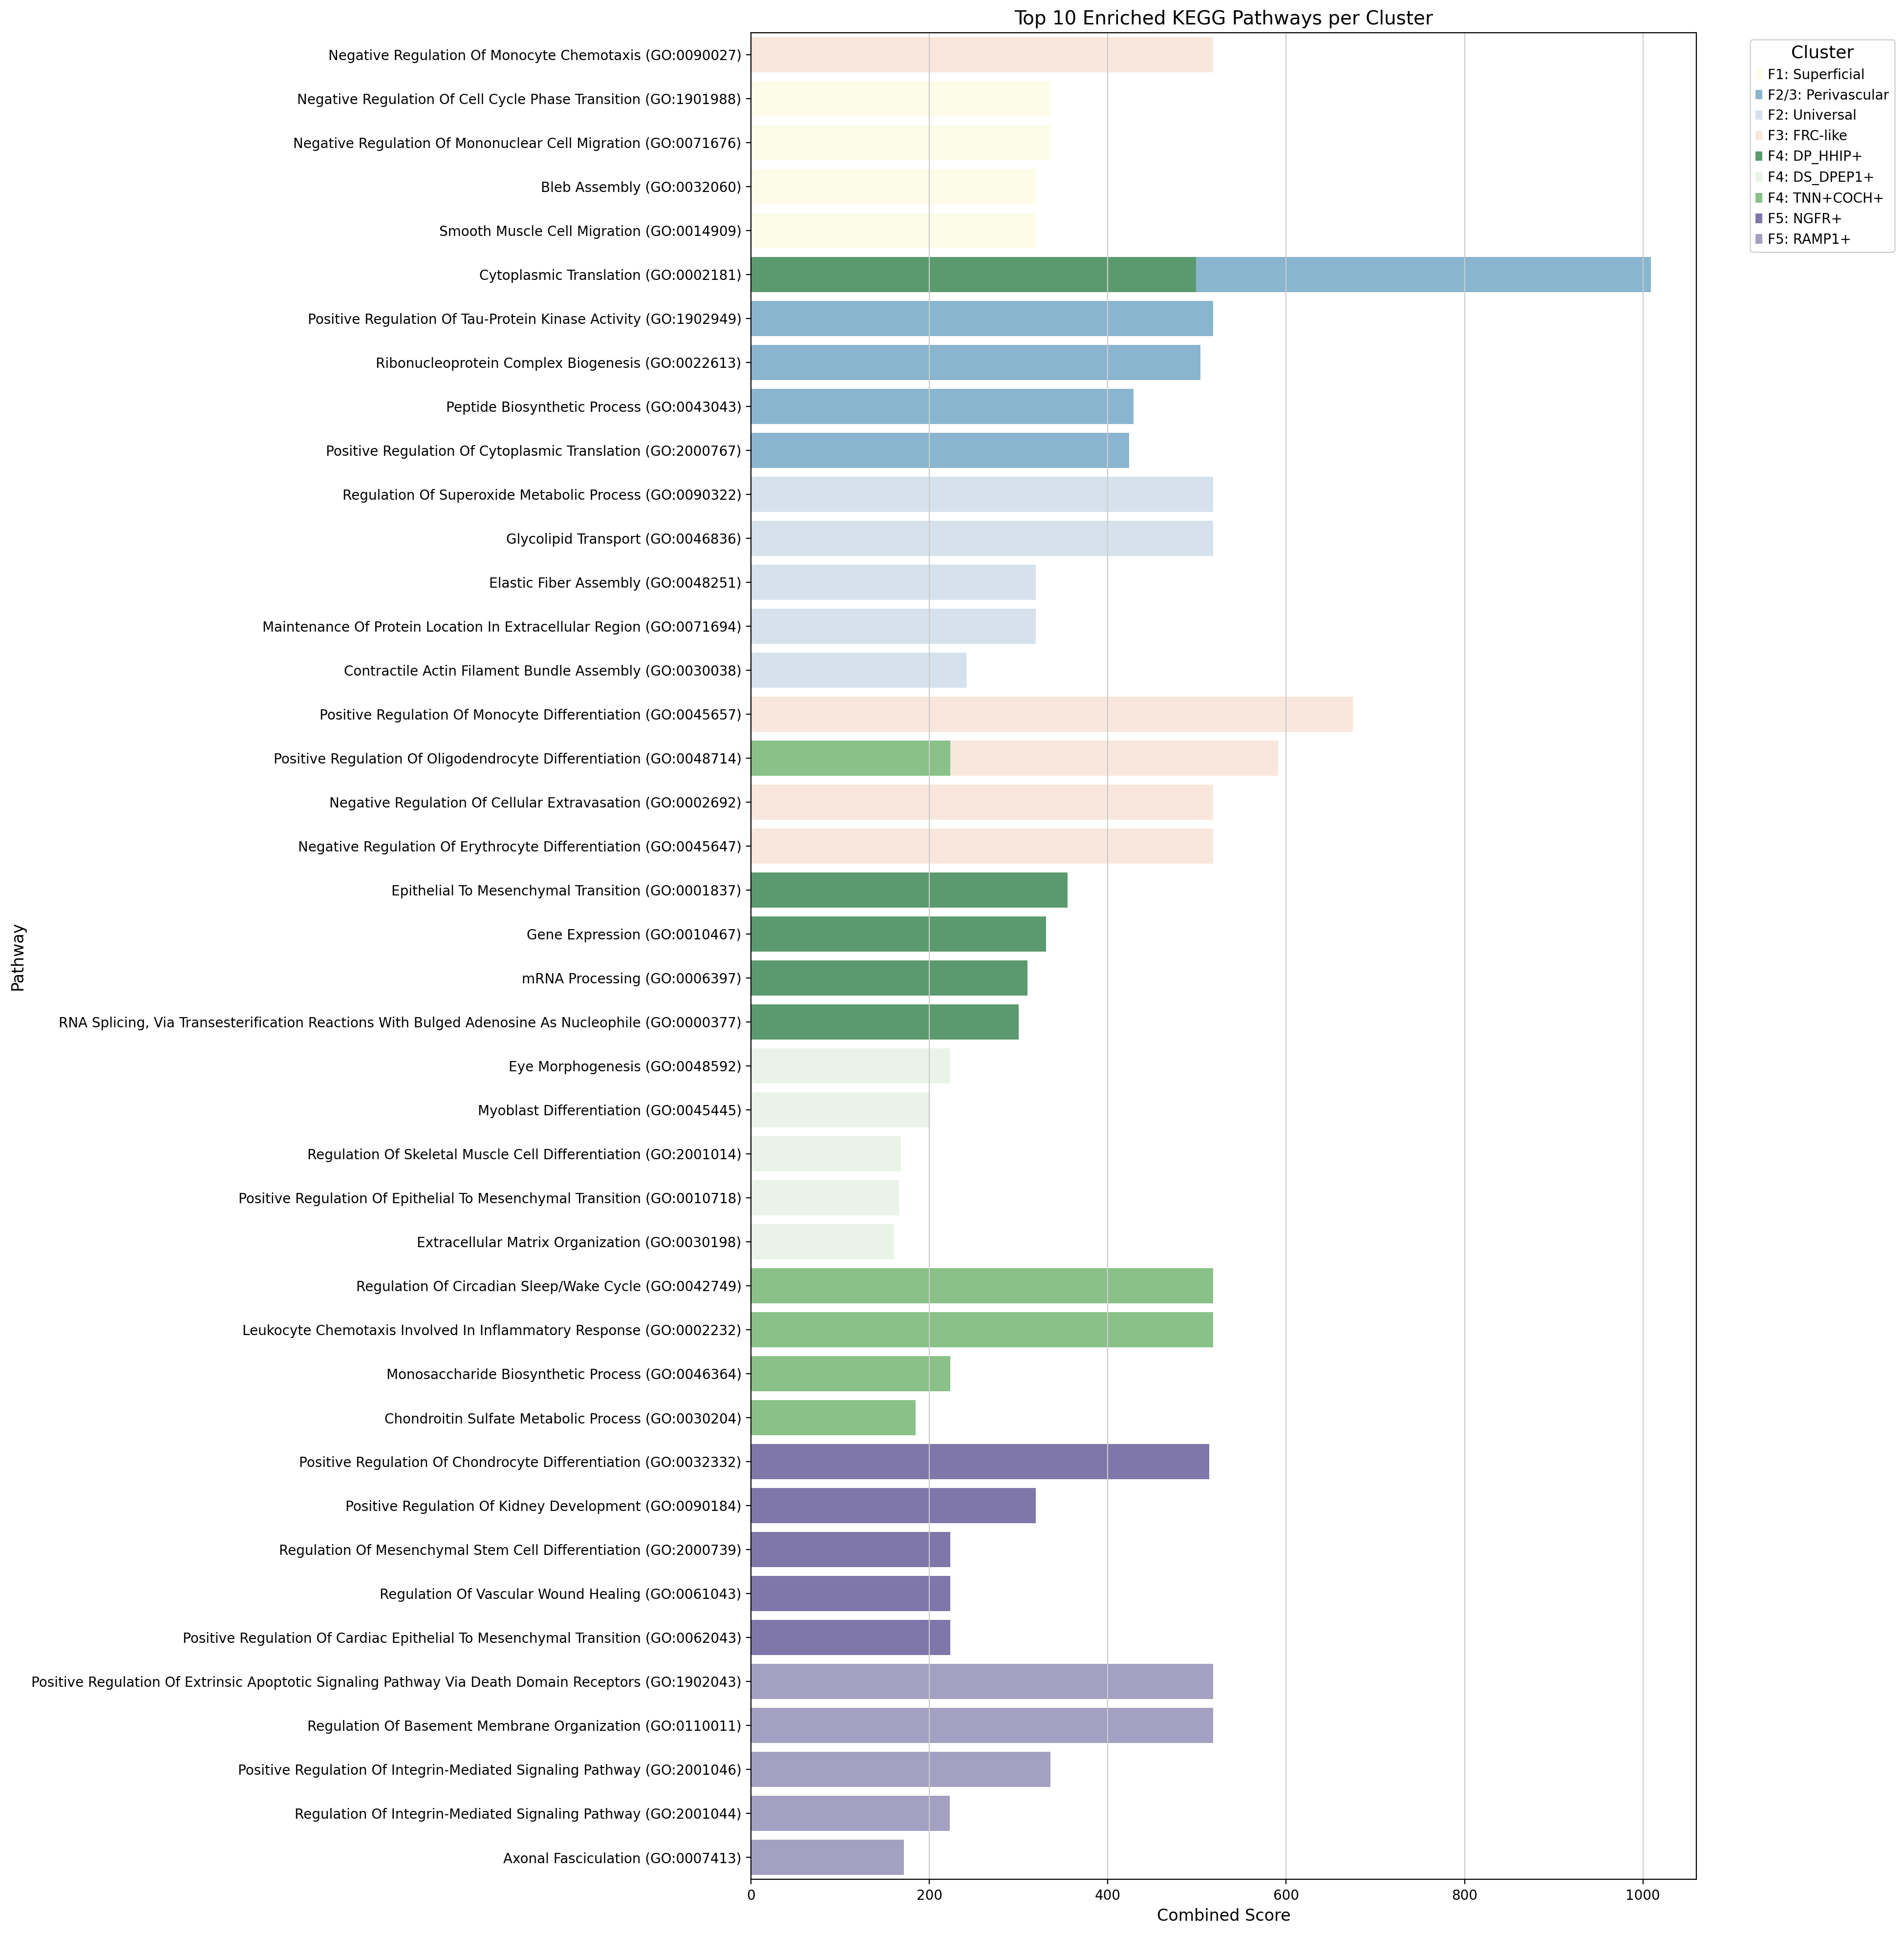

In [41]:
color_palettes = {
  'F1: Superficial' :  '#ffffe5',  # Light Salmon
   'F1: Superficial_Lesional': '#fece65',  # Dark Orange
    'F2: Universal': '#d1e2f2',  # Dodger Blue
    'F2/3: Perivascular': '#7fb8da',  # Deep Sky Blue
    'F3: FRC-like':  '#fee5d8',  # Tomato Red

    'F4: DS_DPEP1+':  '#e7f5e5',  # Lime Green
    'F4: TNN+COCH+':  '#80ca80',  # Medium Sea Green
    'F4: DP_HHIP+': '#51a46b',  # Sea Green

    'F5: RAMP1+':  '#9e9ac8',  # Medium Purple
    'F5: NGFR+':  '#796eb2',  # Steel Blue
    'F6: Inflammatory myofibroblast': '#05ffff',  # Steel Blue
    'F6: Myofibroblast':  '#55aaff',  # Steel Blue

    'F7: Myofibroblast fascia-like':  '#f48ebe',  # Dark Red
    'F_Fascia':  '#454545',  # Gray
}


PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, PLOTTING_VALUE)).reset_index(drop=True)


top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


cluster_colors = top_gsea_df['Cluster'].map(color_palettes)


plt.figure(figsize=(20, 20))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
plt.tight_layout()
plt.show()

In [42]:
ORDER = ['F1: Superficial', 'F2: Universal',  'F2/3: Perivascular',  'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+','F5: NGFR+', 'F4: DP_HHIP+', 'F5: RAMP1+']


In [43]:
# color_palettes = {
#   'F1: Superficial' :  '#ffffe5',  # Light Salmon
#    'F1: Superficial_Lesional': '#fece65',  # Dark Orange
#     'F2: Universal': '#d1e2f2',  # Dodger Blue
#     'F2/3: Stroma_PPARG+': '#7fb8da',  # Deep Sky Blue
#     'F3: FRC-like':  '#fee5d8',  # Tomato Red

#     'F4: DS_DPEP1+':  '#e7f5e5',  # Lime Green
#     'F4: TNN+COCH+':  '#80ca80',  # Medium Sea Green
#     'F4: DP_HHIP+': '#51a46b',  # Sea Green

#     'F5: RAMP1+':  '#9e9ac8',  # Medium Purple
#     'F5: NGFR+':  '#796eb2',  # Steel Blue
#     'F6: Inflammatory myofibroblast': '#05ffff',  # Steel Blue
#     'F6: Myofibroblast':  '#55aaff',  # Steel Blue

#     'F7: Myofibroblast fascia-like':  '#f48ebe',  # Dark Red
#     'F_Fascia':  '#454545',  # Gray
# }


# PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(15, PLOTTING_VALUE)).reset_index(drop=True)


# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


# cluster_colors = top_gsea_df['Cluster'].map(color_palettes)


# plt.figure(figsize=(20, 15))
# sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)

# plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
# plt.xlabel(PLOTTING_VALUE, fontsize=12)
# plt.ylabel('Pathway', fontsize=12)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# # Set xmax
# plt.xlim(right=1000)  # Limits x-axis to a maximum of 1000

# # Remove the top and right border
# sns.despine(top=True, right=True)

# # Remove background grid
# plt.grid(False)

# # Adjust legend
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')

# plt.tight_layout()
# plt.show()


 

In [61]:
list(top_gsea_df['Cluster'].unique())

['F1: Superficial',
 'F2: Universal',
 'F2/3: Perivascular',
 'F3: FRC-like',
 'F4: DS_DPEP1+',
 'F4: TNN+COCH+',
 'F5: NGFR+',
 'F4: DP_HHIP+',
 'F5: RAMP1+']

/tmp/ipykernel_2680/3867690082.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(35, PLOTTING_VALUE)).reset_index(drop=True)
/tmp/ipykernel_2680/3867690082.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


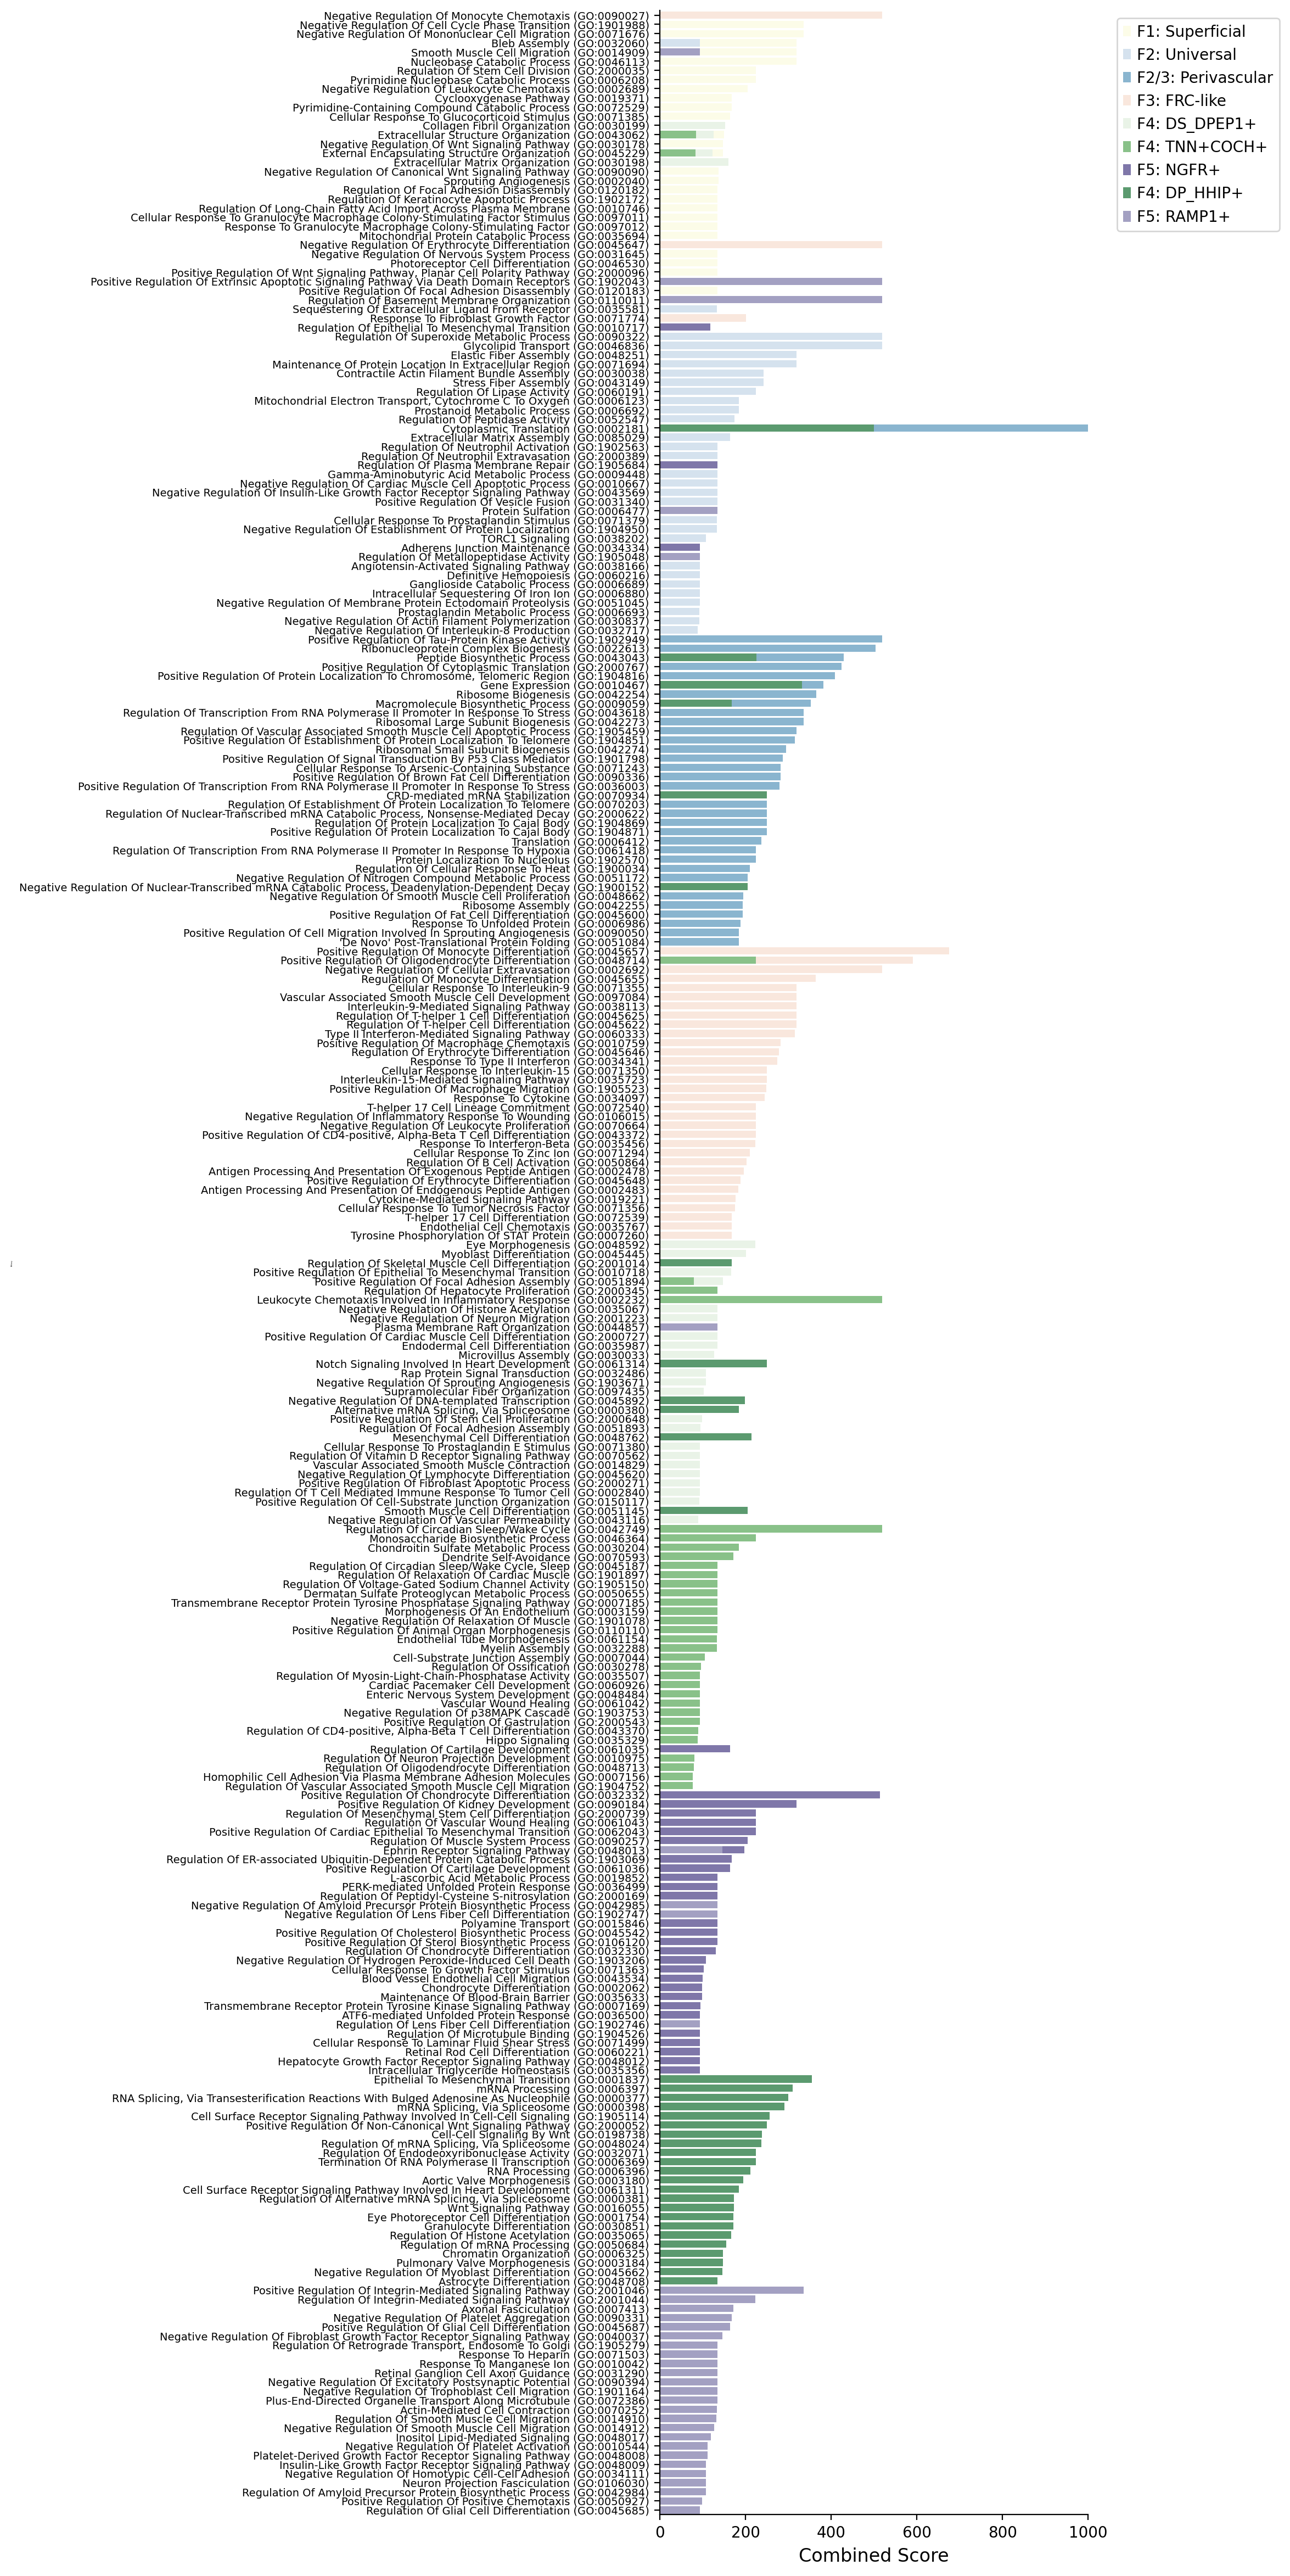

In [57]:
# # color_palettes = {
# #     'F1: Superficial': '#ffffe5',
# #     'F2: Universal': '#d1e2f2',
# #     'F2/3: Stroma_PPARG+': '#7fb8da',
# #     'F3: FRC-like': '#fee5d8',
# #     'F4: DS_DPEP1+': '#e7f5e5',
# #     'F4: TNN+COCH+': '#80ca80',
# #     'F4: DP_HHIP+': '#51a46b',
# #     'F5: RAMP1+': '#9e9ac8',
# #     'F5: NGFR+': '#796eb2',
# # }

# ORDER = [
#     'F1: Superficial', 'F2: Universal', 'F2/3: Stroma_PPARG+',
#     'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+', 
#     'F5: NGFR+', 'F4: DP_HHIP+', 'F5: RAMP1+'
# ]

PLOTTING_VALUE = 'Combined Score'

top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(35, PLOTTING_VALUE)).reset_index(drop=True)

top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=ORDER, ordered=True)
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])
cluster_colors = top_gsea_df['Cluster'].map(color_palettes)

plt.figure(figsize=(5, 30))
sns.barplot(
    x=PLOTTING_VALUE, y='Term', hue='Cluster',
    data=top_gsea_df, palette=color_palettes, dodge=False
)

plt.title('', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=7)
plt.xlim(right=1000)
sns.despine(top=True, right=True)
plt.grid(False)

handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(c)] for c in ORDER if c in labels]
plt.legend(ordered_handles, ORDER, title='', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')

plt.tight_layout()
plt.savefig("sfig2/gsea_healthy.pdf", dpi=300)
plt.show()




In [68]:
group1_clusters = [
    'F1: Superficial',
    'F2: Universal',
    'F2/3: Perivascular',
    'F3: FRC-like'
]

group2_clusters = [
    'F4: DS_DPEP1+',
    'F4: TNN+COCH+',
    'F5: NGFR+',
    'F4: DP_HHIP+',
    'F5: RAMP1+'
]

def plot_gsea_cluster_group(df, clusters, filename, color_palette, plotting_value='Combined Score'):
    filtered_df = df[df['Cluster'].isin(clusters)].copy()
    filtered_df['Cluster'] = pd.Categorical(filtered_df['Cluster'], categories=clusters, ordered=True)
    filtered_df = filtered_df.sort_values(by=['Cluster', plotting_value], ascending=[True, False])
    
    plt.figure(figsize=(3, 30))
    sns.barplot(
        x=plotting_value, y='Term', hue='Cluster',
        data=filtered_df, palette=color_palette, dodge=False
    )

    plt.title('', fontsize=14)
    plt.xlabel(plotting_value, fontsize=12)
    plt.ylabel('Pathway', fontsize=0)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(right=1000)
    sns.despine(top=True, right=True)
    plt.grid(False)

    handles, labels = plt.gca().get_legend_handles_labels()
    ordered_handles = [handles[labels.index(c)] for c in clusters if c in labels]
    plt.legend(ordered_handles, clusters, title='', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

/tmp/ipykernel_2680/2712138008.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


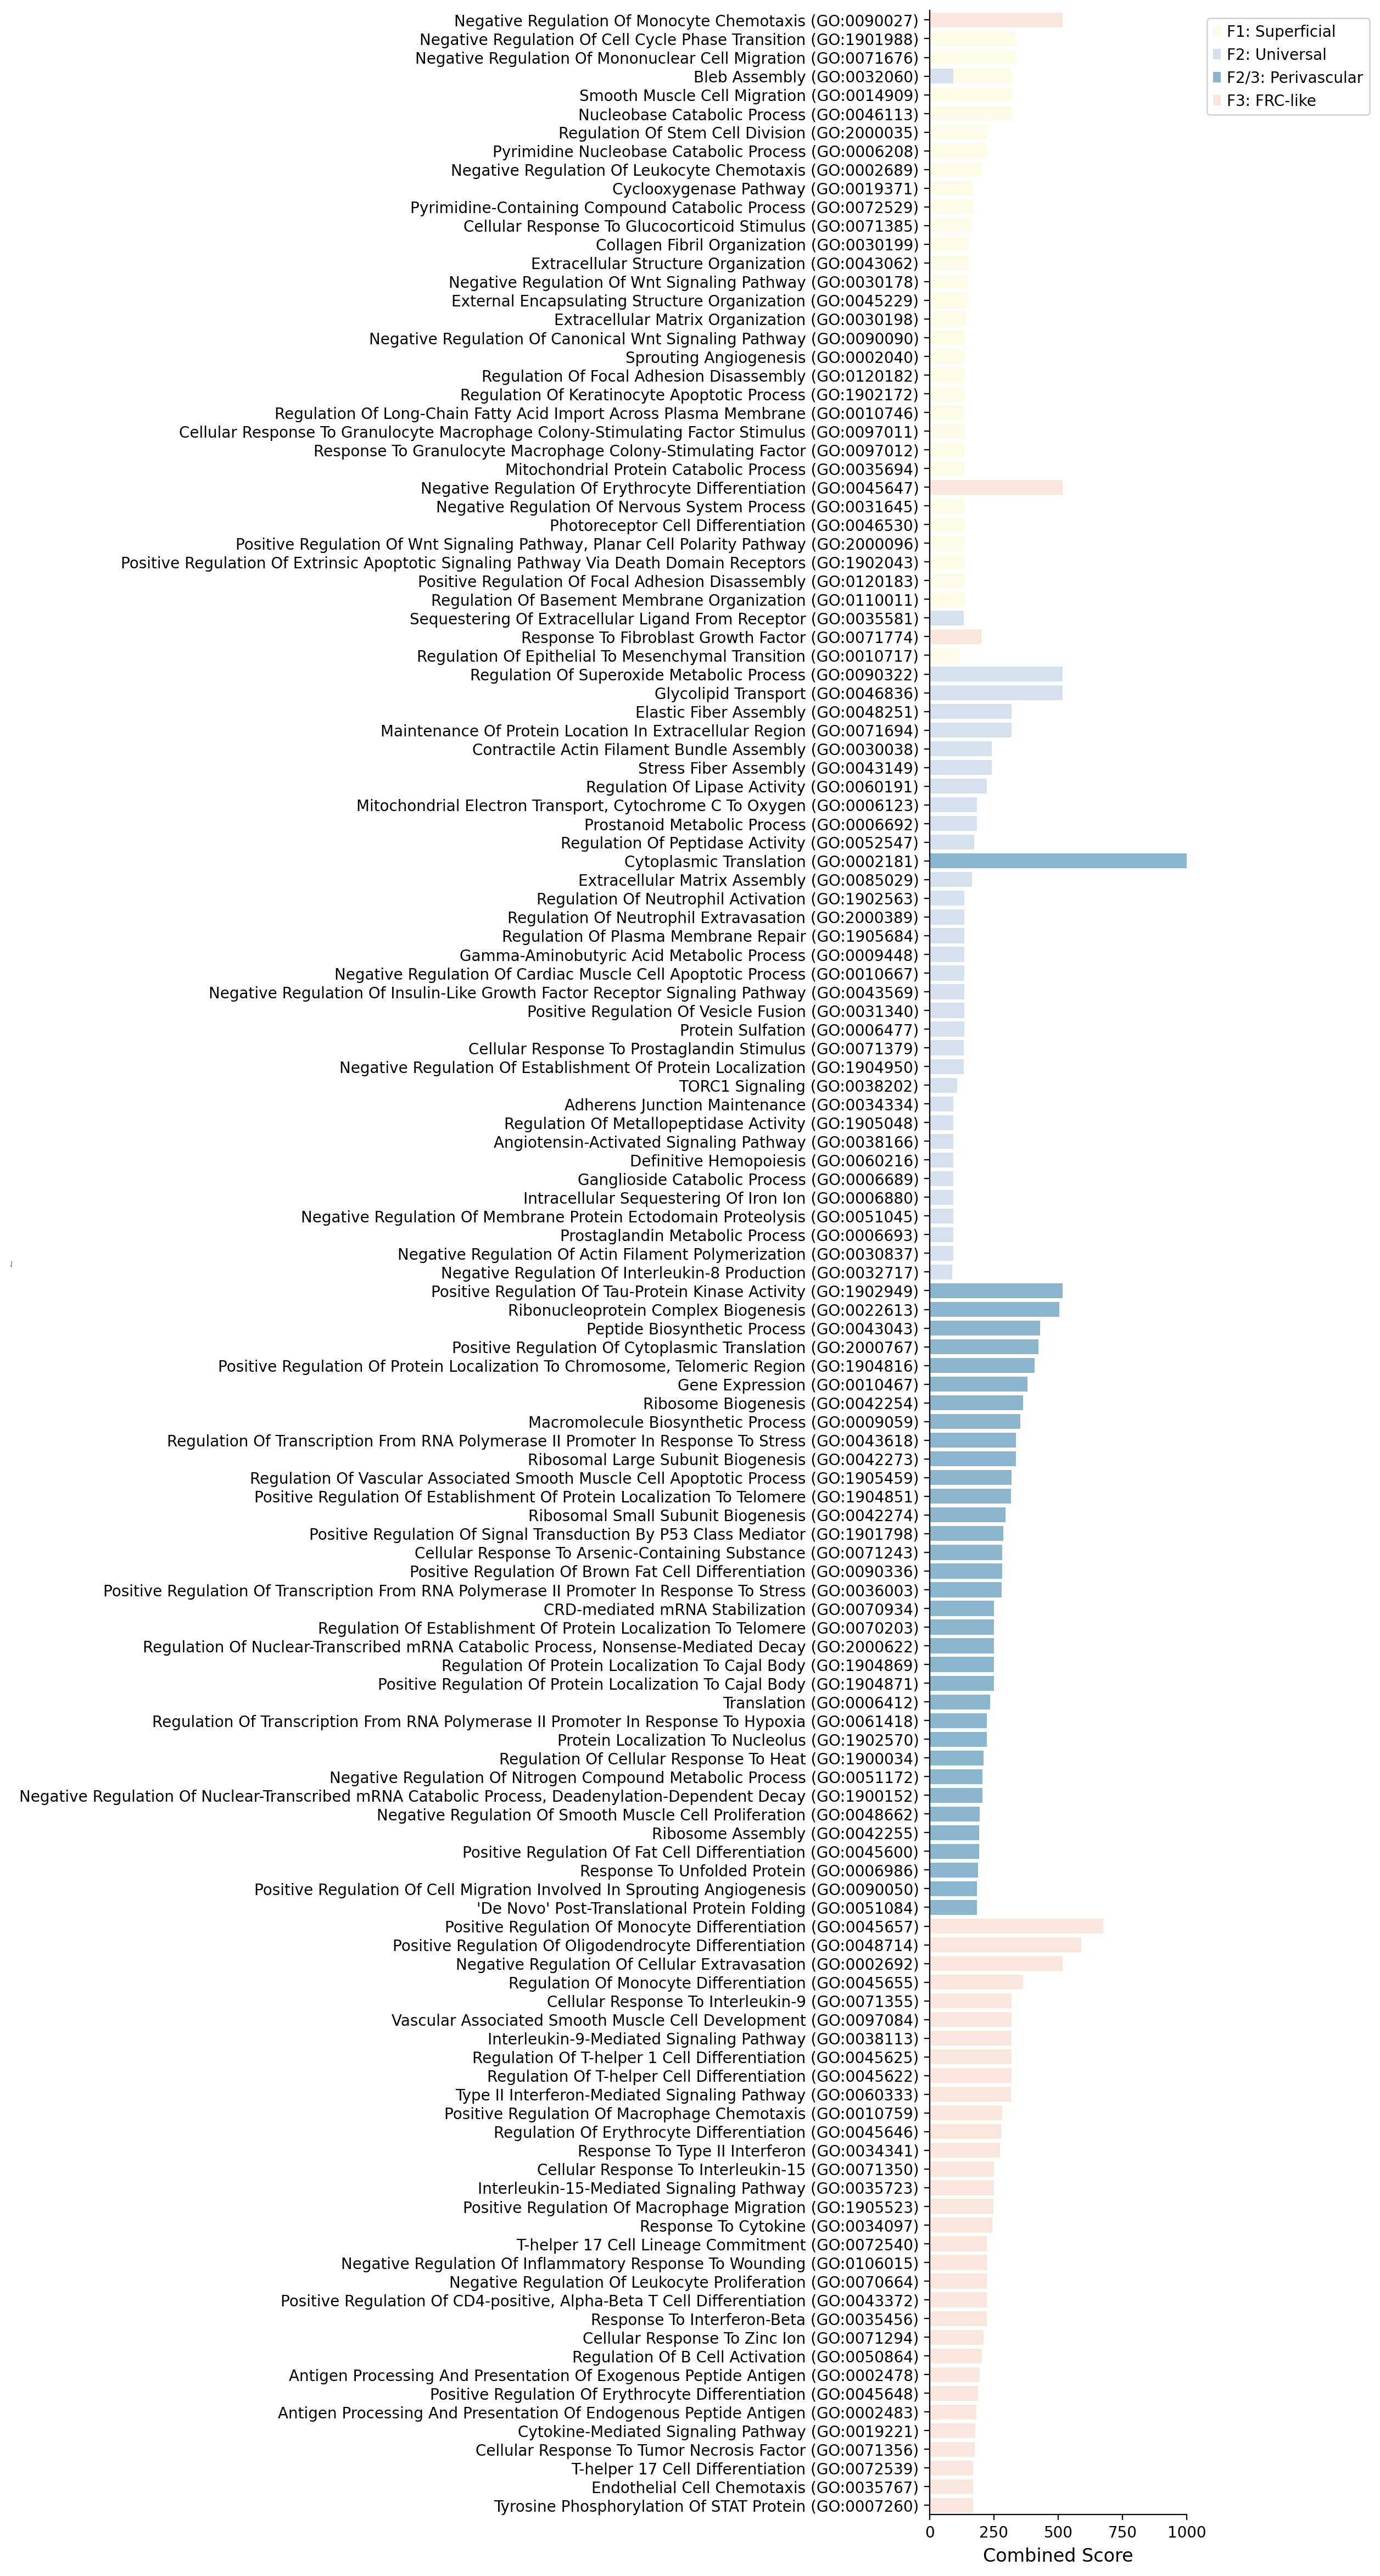

In [69]:
plot_gsea_cluster_group(top_gsea_df, group1_clusters, "sfig2/gsea_group1.pdf", color_palettes)

/tmp/ipykernel_2680/1187061522.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(20, PLOTTING_VALUE)).reset_index(drop=True)
/tmp/ipykernel_2680/1187061522.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


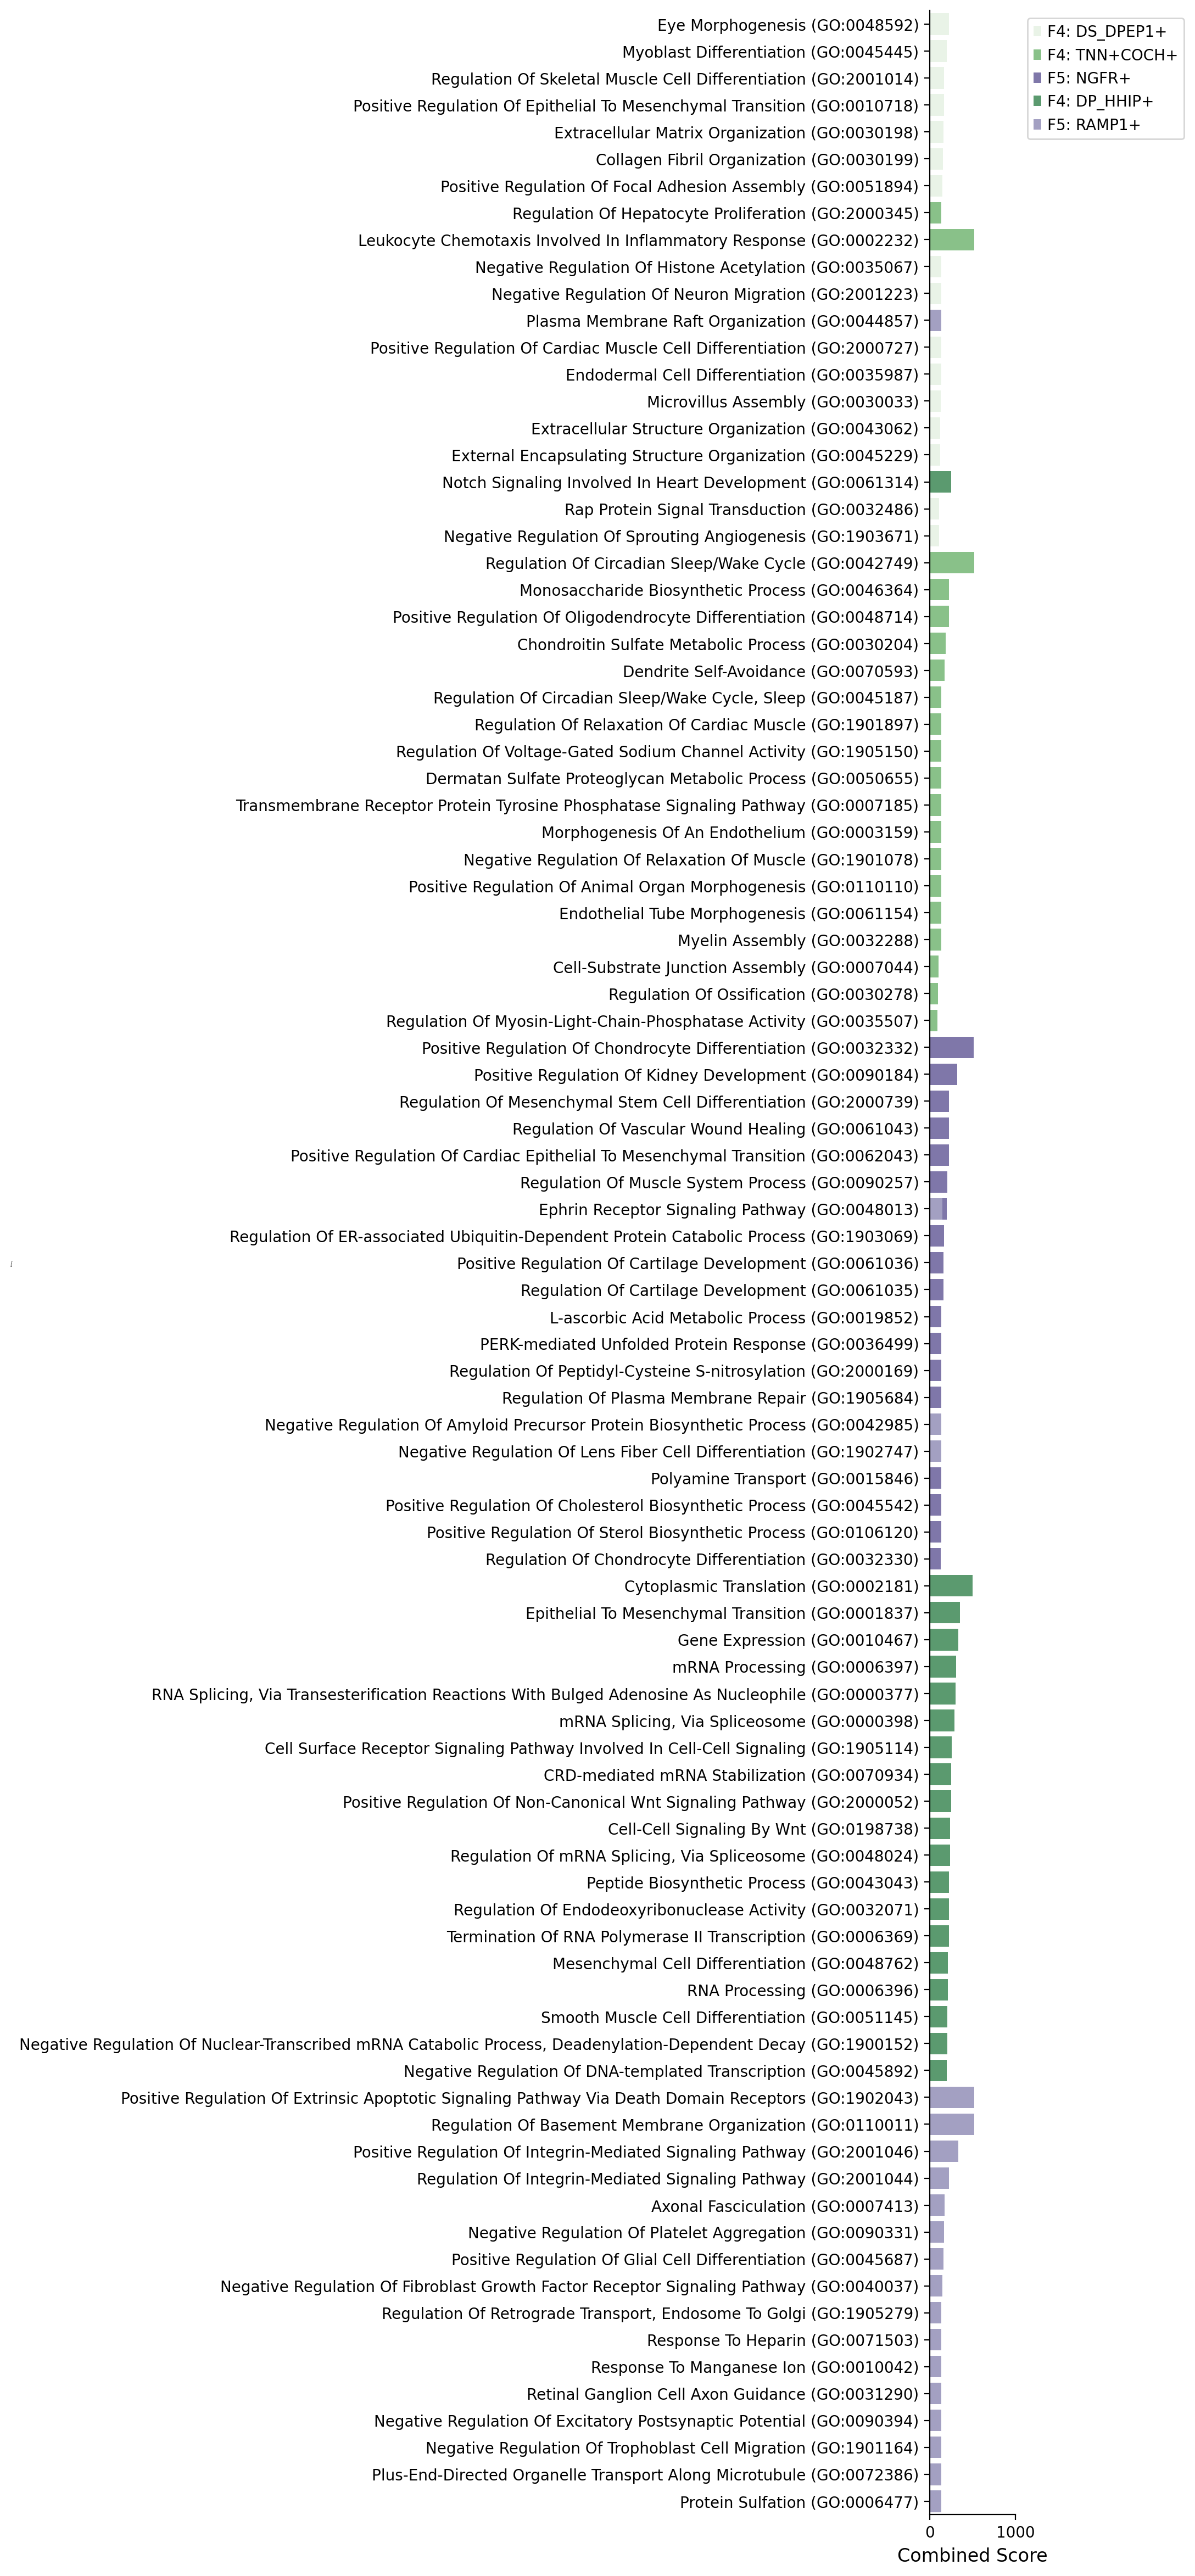

In [74]:
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(20, PLOTTING_VALUE)).reset_index(drop=True)
top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=ORDER, ordered=True)
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])

def plot_gsea_cluster_group(df, clusters, filename, color_palette, plotting_value='Combined Score'):
    filtered_df = df[df['Cluster'].isin(clusters)].copy()
    filtered_df['Cluster'] = pd.Categorical(filtered_df['Cluster'], categories=clusters, ordered=True)
    filtered_df = filtered_df.sort_values(by=['Cluster', plotting_value], ascending=[True, False])
    
    plt.figure(figsize=(1, 30))
    sns.barplot(
        x=plotting_value, y='Term', hue='Cluster',
        data=filtered_df, palette=color_palette, dodge=False
    )

    plt.title('', fontsize=14)
    plt.xlabel(plotting_value, fontsize=12)
    plt.ylabel('Pathway', fontsize=0)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(right=1000)
    sns.despine(top=True, right=True)
    plt.grid(False)

    handles, labels = plt.gca().get_legend_handles_labels()
    ordered_handles = [handles[labels.index(c)] for c in clusters if c in labels]
    plt.legend(ordered_handles, clusters, title='', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()
    
    
plot_gsea_cluster_group(top_gsea_df, group2_clusters, "sfig2/gsea_group2.pdf", color_palettes)

In [45]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # # Define color palettes
# # color_palettes = {
# #     'F1: Superficial': '#ffffe5',
# #     'F1: Superficial_Lesional': '#fece65',
# #     'F2: Universal': '#d1e2f2',
# #     'F2/3: Stroma_PPARG+': '#7fb8da',
# #     'F3: FRC-like': '#fee5d8',
# #     'F4: DS_DPEP1+': '#e7f5e5',
# #     'F4: TNN+COCH+': '#80ca80',
# #     'F4: DP_HHIP+': '#51a46b',
# #     'F5: RAMP1+': '#9e9ac8',
# #     'F5: NGFR+': '#796eb2',
# #     'F6: Inflammatory myofibroblast': '#05ffff',
# #     'F6: Myofibroblast': '#55aaff',
# #     'F7: Myofibroblast fascia-like': '#f48ebe',
# #     'F_Fascia': '#454545'
# # }

# # Ensure column exists
# print(gsea_df.columns)  # Check column names
# if "Adjusted P-value" not in gsea_df.columns:
#     raise ValueError("Column 'Adjusted P-value' not found in DataFrame!")

# # Convert to numeric & drop NaNs
# PLOTTING_VALUE = 'Adjusted P-value'
# gsea_df[PLOTTING_VALUE] = pd.to_numeric(gsea_df[PLOTTING_VALUE], errors="coerce")
# gsea_df.dropna(subset=[PLOTTING_VALUE], inplace=True)

# # 🔹 **Filter for significance (p < 0.05)**
# SIGNIFICANCE_THRESHOLD = 0.05
# gsea_df = gsea_df[gsea_df[PLOTTING_VALUE] < SIGNIFICANCE_THRESHOLD]

# # Select top 15 terms per cluster (smallest p-values first)
# top_gsea_df = gsea_df.groupby('Cluster').apply(
#     lambda x: x.nsmallest(15, PLOTTING_VALUE)  # Change `nlargest` to `nsmallest`
# ).reset_index(drop=True)

# # Sort by Cluster and **Adjusted P-value (ascending)**
# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, True])

# # Map clusters to colors
# cluster_colors = top_gsea_df['Cluster'].map(color_palettes).fillna("black")

# # Plot
# plt.figure(figsize=(20, 20))
# sns.barplot(x=PLOTTING_VALUE, y='Term', hue=top_gsea_df["Cluster"], 
#             data=top_gsea_df, palette=color_palettes, dodge=False)
# plt.title('Top 10 Enriched KEGG Pathways per Cluster (p < 0.05)', fontsize=14)
# plt.xlabel(PLOTTING_VALUE, fontsize=12)
# plt.ylabel('Pathway', fontsize=12)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
# plt.tight_layout()
# plt.show()

In [ ]:
stop

# TRANSCRIPTION FACTOR

In [ ]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import gseapy as gp
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

  

# sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.settings.n_jobs=4
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(4,4))
# plt.rcParams['pdf.fonttype'] = 42
# %matplotlib inline


In [ ]:

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v4')
net = dc.get_collectri(organism='human', split_complexes=False)
net

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [ ]:
sc.pp.highly_variable_genes(adata,  
                                n_top_genes=6000, 
                                subset=True,
                                batch_key="DonorID",
                                check_values=False,
                                #layer="normalized"
                               ) #100

In [ ]:
adata.raw = ad.AnnData(adata.layers["counts"].copy(), var=adata.var.copy(), obs=adata.obs.copy())
get_collectri
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

In [ ]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()

acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts




In [ ]:
sc.pl.umap(acts, color=['KLF5', 'corefb_names2'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['KLF5'], groupby='corefb_names2', rotation=90)


In [ ]:
df= dc.rank_sources_groups(acts, groupby='corefb_names2', reference='rest', method='t-test_overestim_var')
df
n_markers = 5
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

In [ ]:

ORDER=['F1: Superficial',
 'F2: Universal',
        'F2/3: Perivascular',
 'F3: FRC-like',
 'F4: DS_DPEP1+',
 'F4: TNN+COCH+',
 'F4: DP_HHIP+', 'F5: RAMP1+',
 'F5: NGFR+',

 #'F6: Inflammatory myofibroblast',
 #'F6: Myofibroblast',

 #'F7: Fascia-like myofibroblast',
 #'F_Fascia',
      ]
source_markers = {key: source_markers[key] for key in ORDER if key in source_markers}

# sc.pl.matrixplot(acts, source_markers, 'test13', dendrogram=True, standard_scale='var',
#                  colorbar_title='Z-scaled scores', cmap='Reds',categories_order=ORDER)
# sc.pl.matrixplot(acts, source_markers, 'test13', dendrogram=True,#standard_scale='var',
#                  colorbar_title='scores', cmap='Reds',categories_order=ORDER,
#                 vmax=15)


# Explicitly set category order
acts.obs['corefb_names2'] = pd.Categorical(acts.obs['corefb_names2'], categories=ORDER, ordered=True)

# Plot without dendrogram (ensures category order is used)
sc.pl.matrixplot(
    acts, source_markers, 'corefb_names2', 
    dendrogram=False,  # Disable automatic reordering
    standard_scale='var', colorbar_title='Z-scaled scores', 
    cmap='Reds', categories_order=ORDER
)

sc.pl.matrixplot(
    acts, source_markers, 'corefb_names2', 
    dendrogram=False,  # Disable automatic reordering
    colorbar_title='scores', cmap='Reds', 
    categories_order=ORDER, vmax=10,vmin=-0,
)
# sc.pl.matrixplot(acts, source_markers, 'corefb_names2', dendrogram=True, standard_scale='var',
#                  colorbar_title='Z-scaled scores', cmap='RdBu_r')


In [ ]:
dc.plot_network(
    net=net,
    n_sources=['KLF5', 'KLF4', "IRF8"],
    n_targets=5,
    node_size=1,
    s_cmap='white',
    t_cmap='white',
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    figsize=(5, 5)
)